<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/Multi_layer_Perceptron_MLP/ANN_carvao_TempIgn_maio_01_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [ ]:
# para gerar o grafico no browser
%matplotlib inline

In [ ]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [ ]:
# leitura dos dados
df=pd.read_csv("Paper_Carvao_China_abril_12_2016.csv")
print(df.head())

   Unnamed: 0 Cod  Water    Ash  Volatil  ...  Nitro  Sulfur  Oxygen   TC     Ea
0           1  LL   4.19  19.45    33.19  ...   1.02    4.38    7.66  435  170.1
1           2  YY   1.06  20.46    31.53  ...   1.38    0.74    7.51  451  206.6
2           3  SF   6.60   9.56    31.49  ...   0.95    0.38   12.56  431  273.5
3           4  YM   9.47  14.19    30.02  ...   0.83    0.44   13.71  403  160.8
4           5  ZZ   1.84  18.10    29.43  ...   1.22    0.88    8.02  466  228.4

[5 rows x 14 columns]


In [ ]:
df.head(3)

,Unnamed: 0,Cod,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
0,1,LL,4.19,19.45,33.19,43.17,23.91,59.22,4.08,1.02,4.38,7.66,435,170.1
1,2,YY,1.06,20.46,31.53,46.94,23.91,64.22,4.63,1.38,0.74,7.51,451,206.6
2,3,SF,6.60,9.56,31.49,52.35,26.22,66.34,3.61,0.95,0.38,12.56,431,273.5


In [ ]:
df.tail(3)

,Unnamed: 0,Cod,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
61,62,YM4LA4JC2,5.70,16.22,19.05,59.03,25.28,66.86,3.32,1.16,0.39,6.35,408,176.4
62,63,YY2HN4LQ4,2.02,20.02,19.57,58.40,25.26,66.78,3.62,1.17,0.54,5.85,475,252.4
63,64,YY2PX2LA6,2.05,19.30,17.23,61.42,26.70,68.15,3.50,1.23,0.62,5.15,481,256.0


In [ ]:
Dat_Select=df.iloc[:,2:]

In [ ]:
Dat_Select.head(3)

,Water,Ash,Volatil,FixC,NetCal,Carbon,Hydrog,Nitro,Sulfur,Oxygen,TC,Ea
0,4.19,19.45,33.19,43.17,23.91,59.22,4.08,1.02,4.38,7.66,435,170.1
1,1.06,20.46,31.53,46.94,23.91,64.22,4.63,1.38,0.74,7.51,451,206.6
2,6.60,9.56,31.49,52.35,26.22,66.34,3.61,0.95,0.38,12.56,431,273.5


In [ ]:
# separa as colunas de interesse
Index=range(2,6)
Index=[2,4,5,6,11]
X=df.iloc[:,Index].copy()
print(X.head())


   Water  Volatil   FixC  NetCal  Oxygen
0   4.19    33.19  43.17   23.91    7.66
1   1.06    31.53  46.94   23.91    7.51
2   6.60    31.49  52.35   26.22   12.56
3   9.47    30.02  46.32   23.80   13.71
4   1.84    29.43  50.63   27.73    8.02


In [ ]:
Index=[ 'NetCal']
Index =['TC']
y =df[Index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, shuffle=True, random_state=10)# 1

In [ ]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [ ]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [ ]:
# define a rede neural 
N_Hidden=10
N_Hidden=20
#model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=3 )
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=6 )

In [ ]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=20, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=6, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [ ]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [ ]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))

    test calc  test true
0  390.988325      438.0
1  185.562899      431.0
2  494.740056      427.0
3  486.623781      403.0
4  347.602442      448.0
5  457.756565      459.0
6  434.442884      400.0


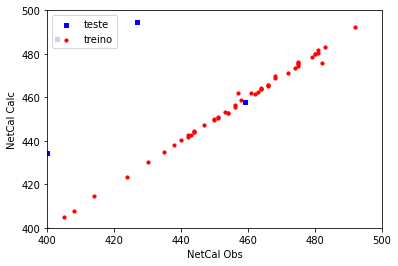

In [ ]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([0,30])
plt.ylim([0,30])
plt.xlim([400,500])
plt.ylim([400,500])
plt.ylabel('NetCal Calc')
plt.xlabel('NetCal Obs')
plt.show()

In [ ]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 12185.521135454883
R^2 teste= -28.765231088598668


In [ ]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 1.402222032201331
R^2 treino= 0.9986024905297427
